In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from utilities import thresholds
from utilities import image
from utilities import calibration

In [6]:
c = calibration.CameraCalibration()
c.load_calibration('../camera_cal/')

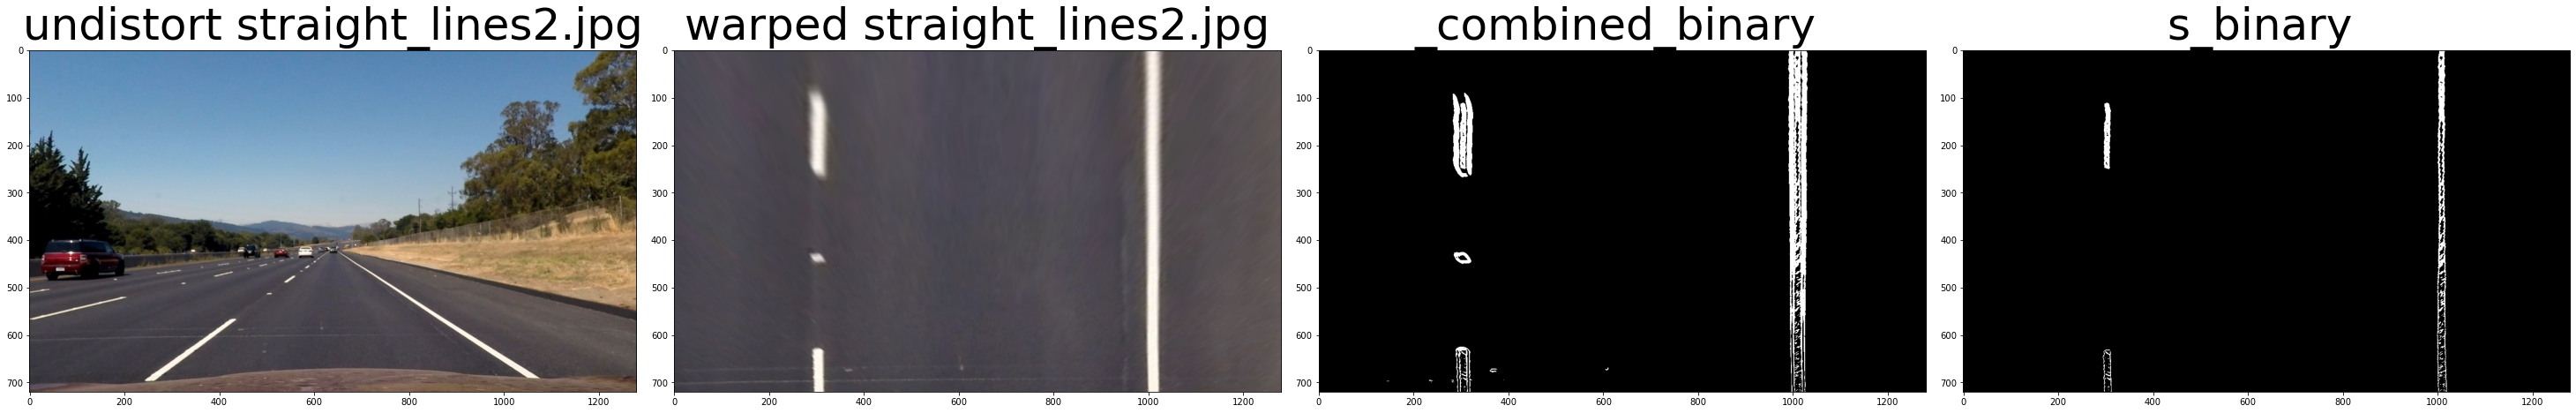

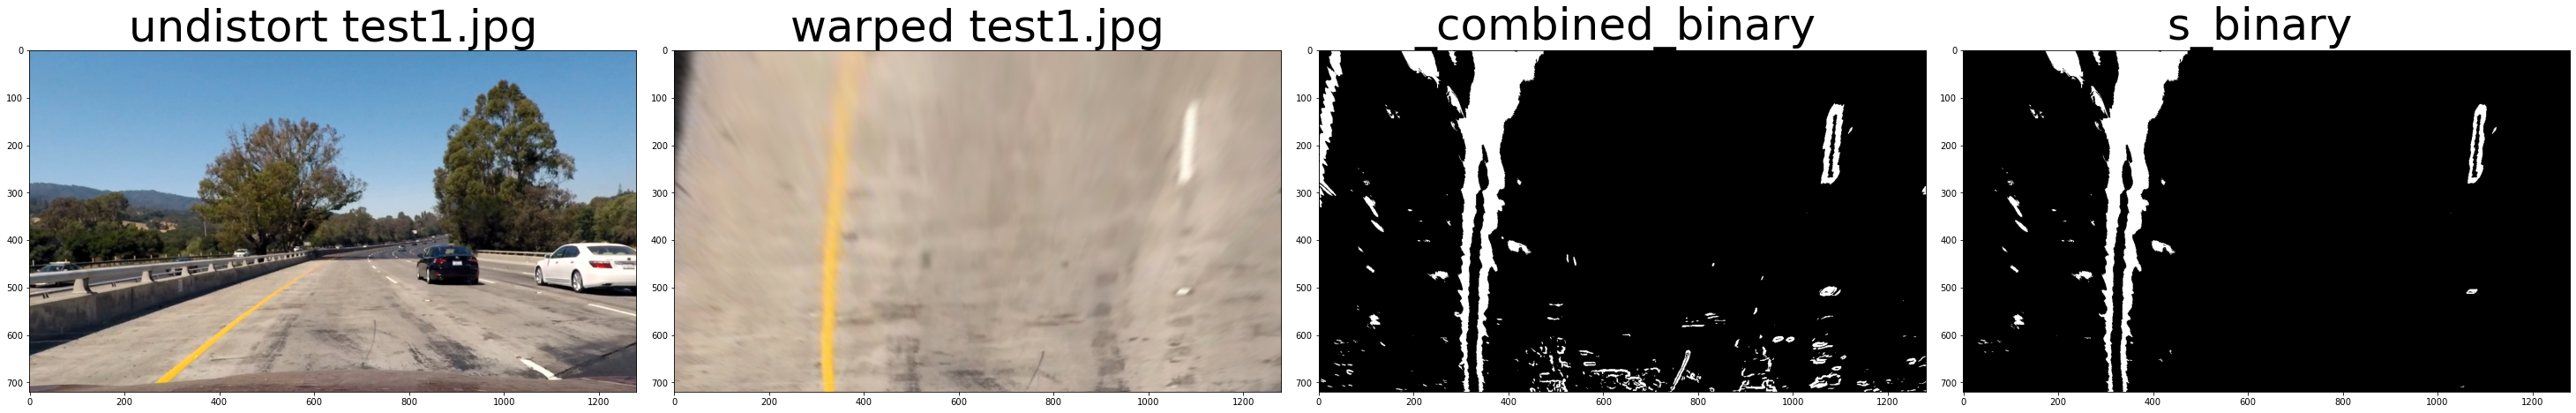

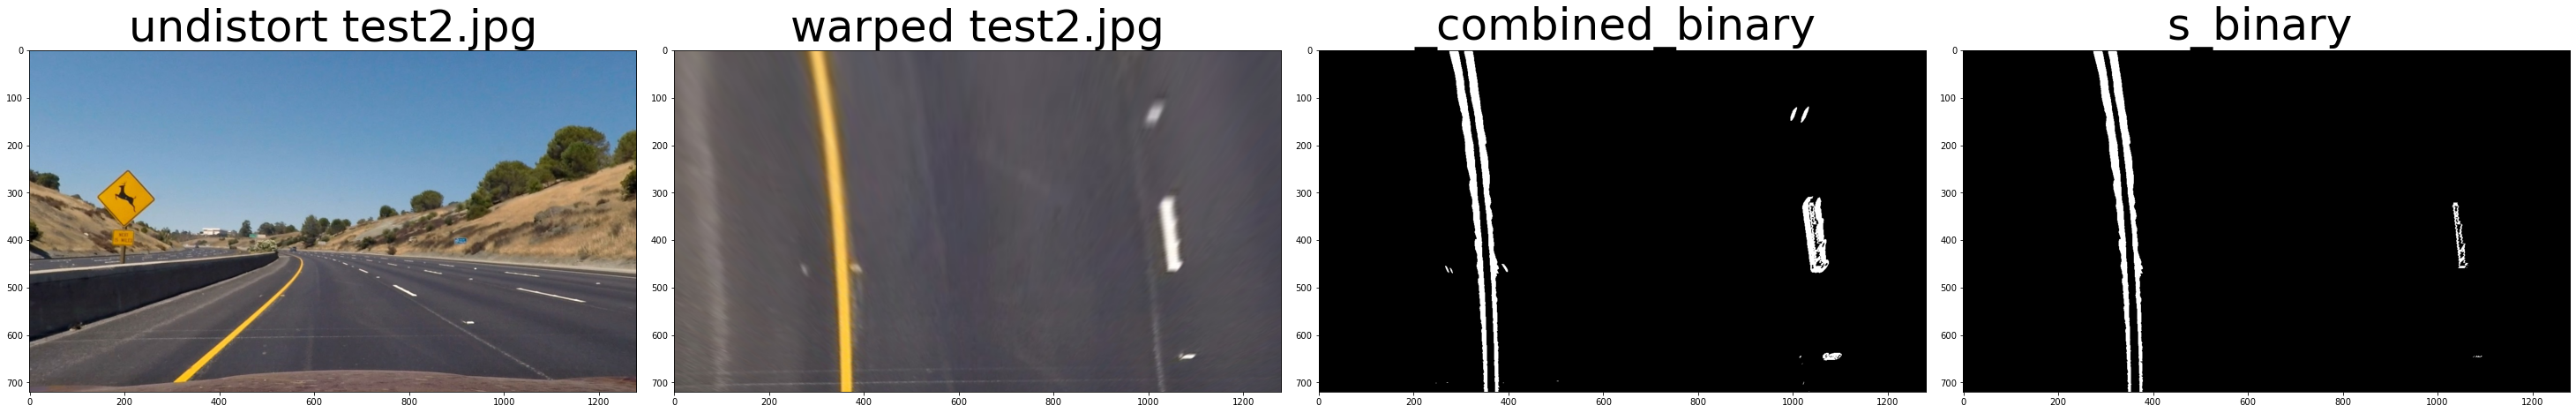

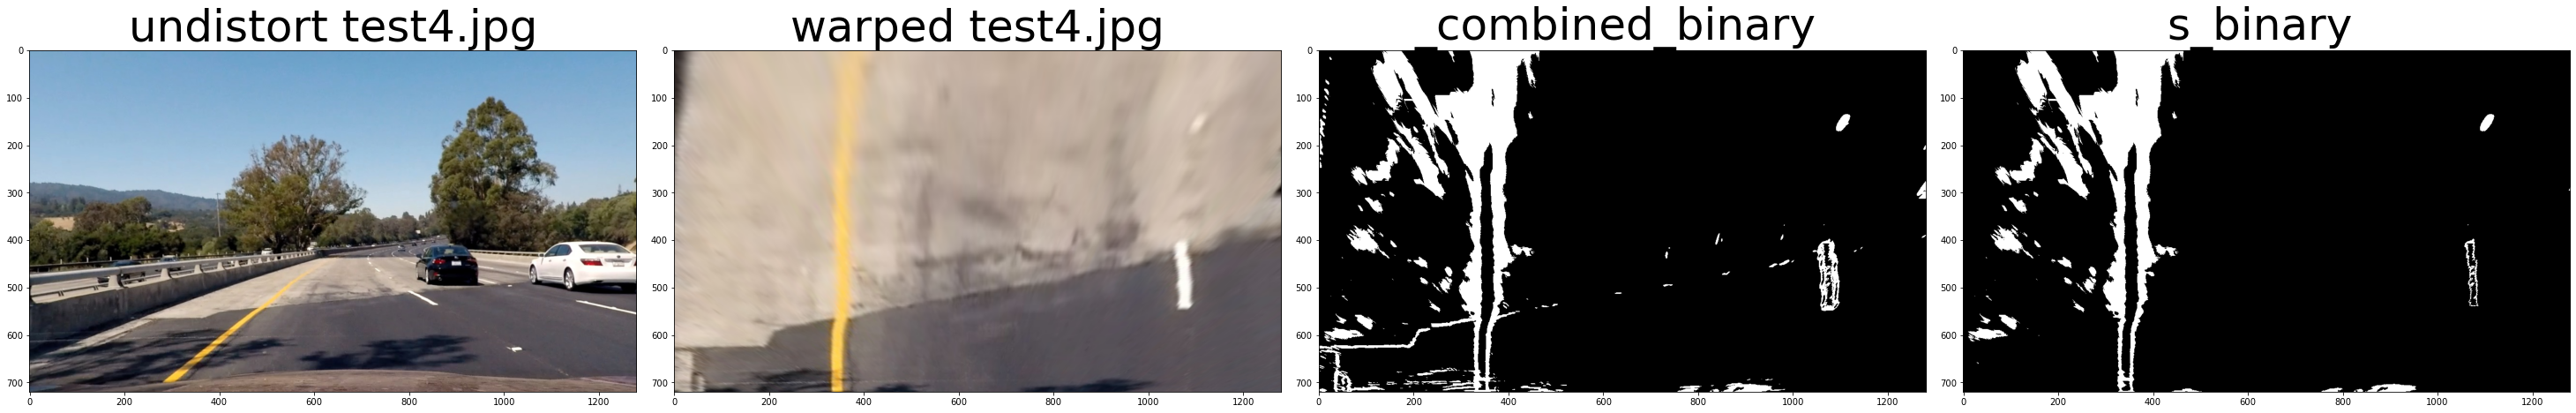

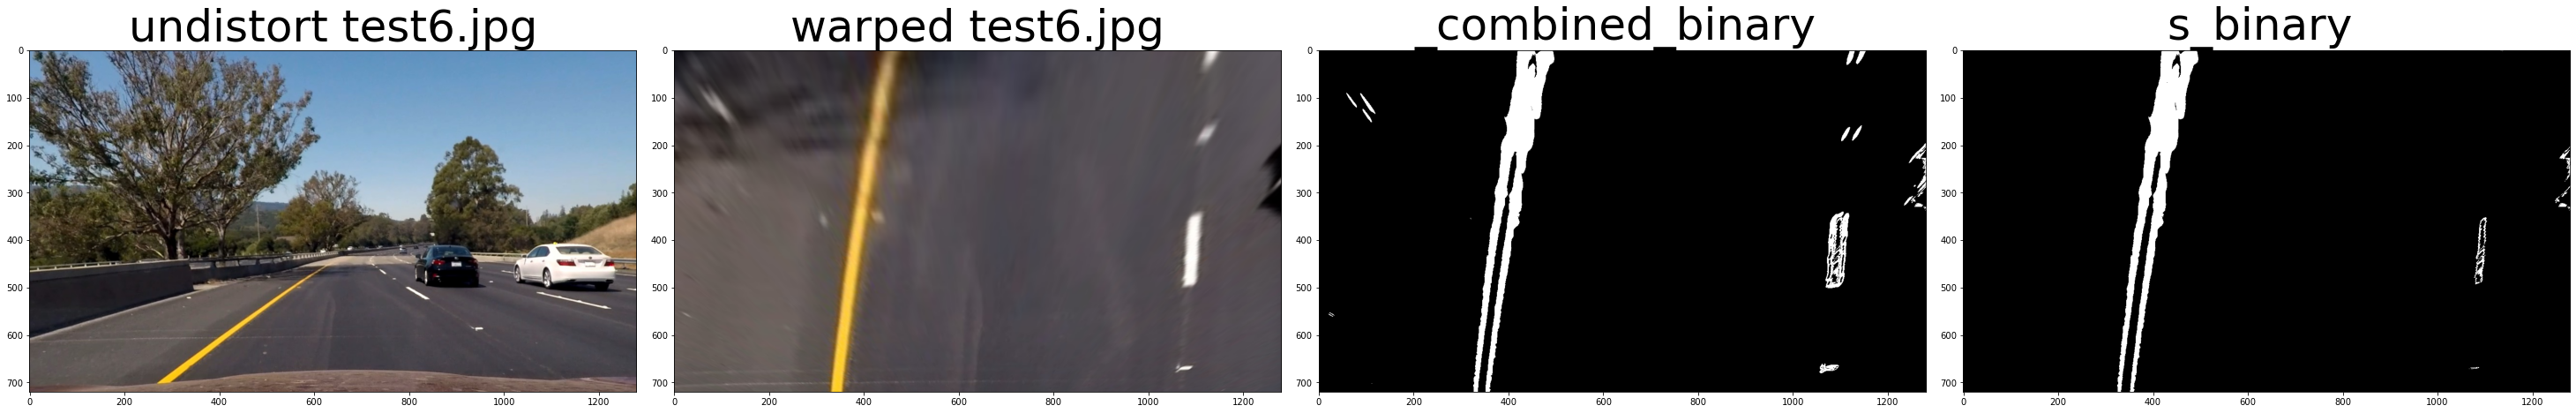

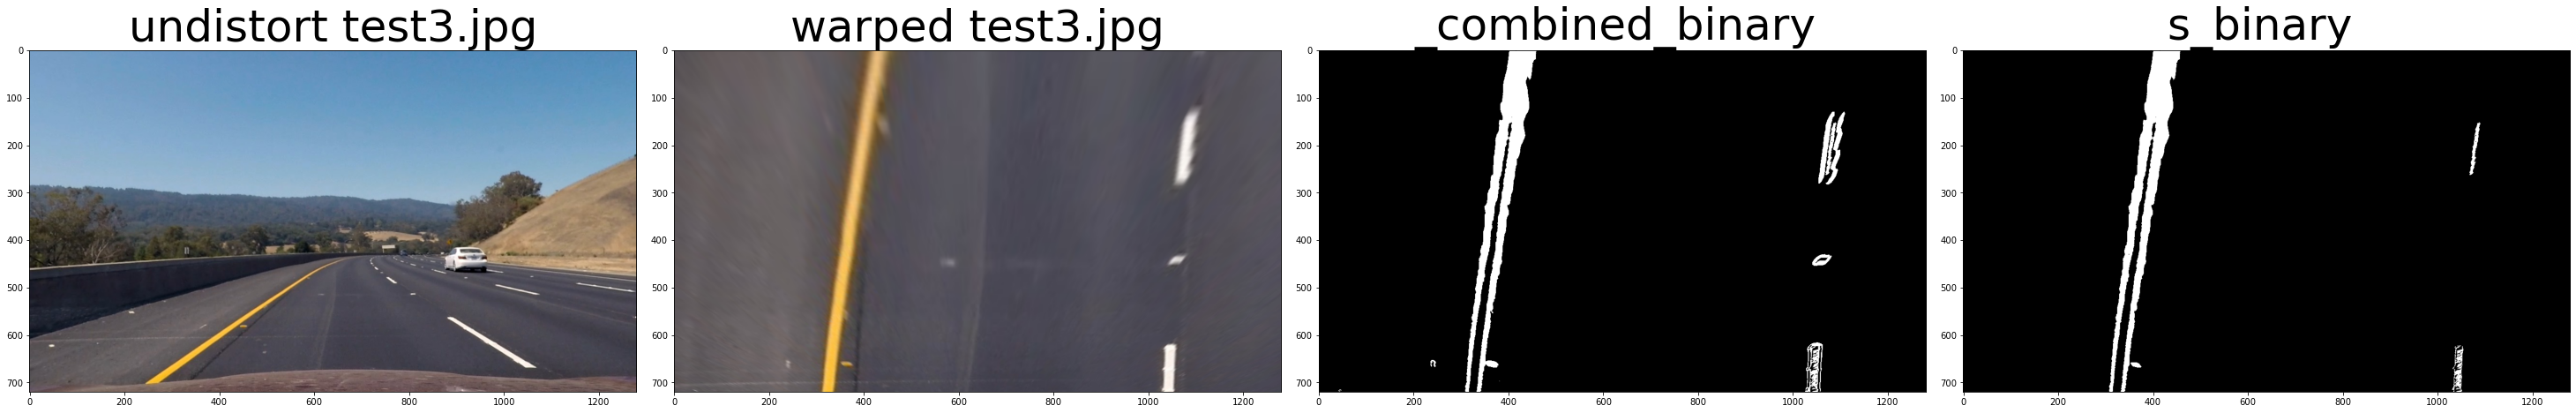

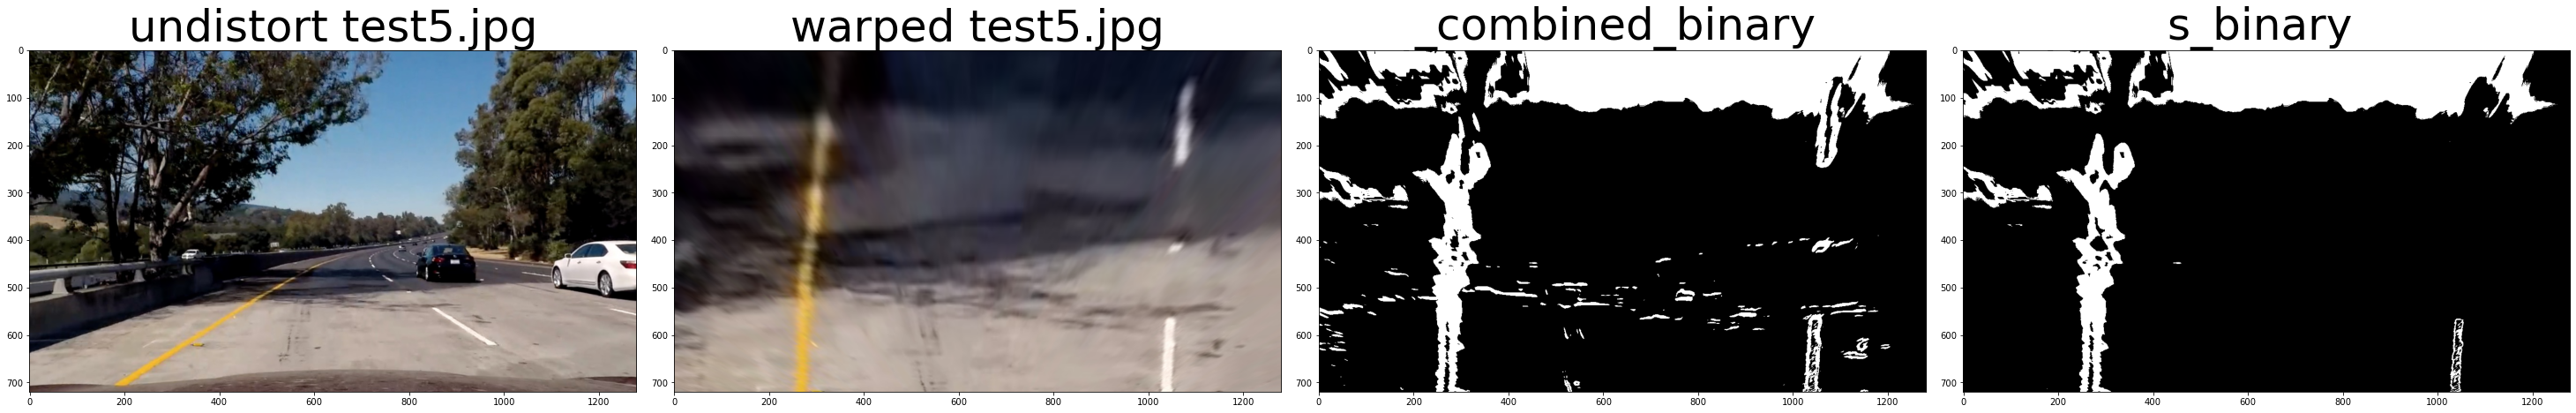

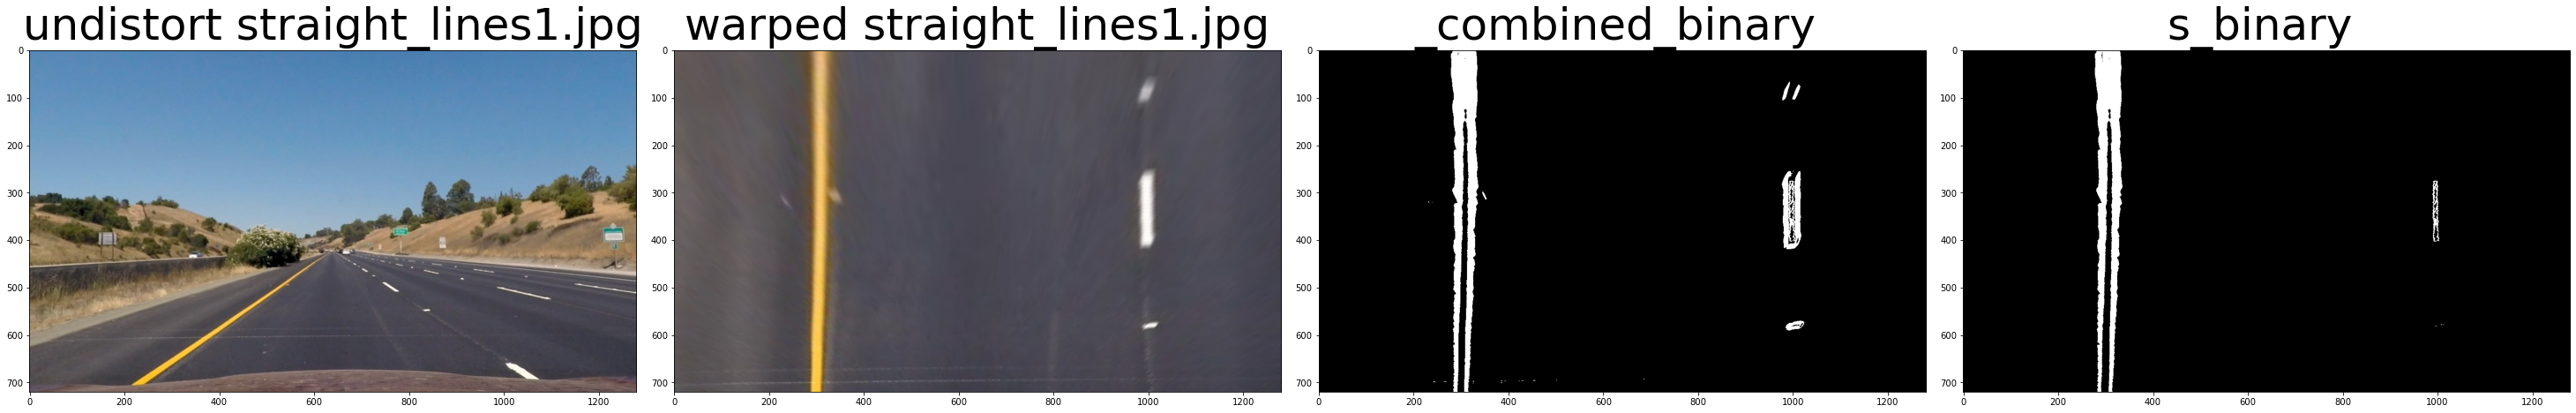

In [7]:
path = '../test_images/'
for i in os.listdir(path):
    img = cv2.imread(path+i)
    undistort,mtx,dist =c.undistort_image(img)
    warped = image.warp_image(undistort,140,470,100)
    combined_binary,s_binary = thresholds.highlight_features(warped,7,(50,150),(50,200),(0.5,np.pi/2),(80,200))
    f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(40, 20))
    f.tight_layout()
    ax1.imshow(cv2.cvtColor(undistort,cv2.COLOR_BGR2RGB))
    ax1.set_title('undistort '+i, fontsize=50)
    ax2.imshow(cv2.cvtColor(warped,cv2.COLOR_BGR2RGB))
    ax2.set_title('warped '+i, fontsize=50)
    ax3.imshow(combined_binary, cmap='gray')
    ax3.set_title('_combined_binary ', fontsize=50)
    ax4.imshow(s_binary,cmap='gray')
    ax4.set_title('s_binary ', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)